# Herbie Accessors

> 🏗 Some features are under construction

Herbie comes with custom xarray DataSet accessors.

```python
# Usage
ds.herbie.<method>
```

Some of these tools require the [Carpenter Workshop](https://github.com/blaylockbk/Carpenter_Workshop) package.

In [1]:
from herbie import Herbie

In [3]:
H = Herbie("2022-12-05 06:00", fxx=6, model="hrrr")
ds = H.xarray("TMP:2 m")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Dec-05 06:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [C:\Users\blaylock\data\hrrr\20221205]


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


In [4]:
ds

<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2022-12-05T06:00:00
    step                 timedelta64[ns] 06:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2022-12-05T12:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 294.4 294.4 294.4 ... 273.0 273.0 273.0
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blaylock\data\hrrr\20221205\subset_0cb2...
    searchString:            TMP:2 m

## Cartopy Coordinate Reference System
Derive the Cartopy coordinate reference system.

This is helpful if you want to plot the data on the map.

> Requires Metpy and Pygrib

In [6]:
ds.herbie.crs

<Derived Projected CRS: +proj=lcc +ellps=sphere +a=6371229.0 +b=6371229.0  ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

## Model domain boundary
Returns the model domain boundary as a polygon. 
1. Polygon in model coordinate system.
1. Polygon in latitude/longitude coordinates.

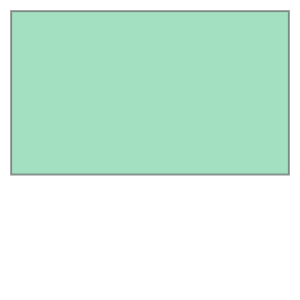

In [8]:
ds.herbie.polygon[0]

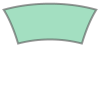

In [9]:
ds.herbie.polygon[1]

## Extract nearest points
Extract the value nearest a latitude/longitude point.

In [14]:
ds.herbie.nearest_points(points=[(-100, 40)])

c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.Dataset>
Dimensions:              (point: 1)
Coordinates:
    time                 datetime64[ns] 2022-12-05T06:00:00
    step                 timedelta64[ns] 06:00:00
    heightAboveGround    float64 2.0
    latitude             float64 40.01
    longitude            float64 260.0
    valid_time           datetime64[ns] 2022-12-05T12:00:00
    metpy_crs            object Projection: lambert_conformal_conic
    y                    float64 1.707e+05
    x                    float64 -2.135e+05
Dimensions without coordinates: point
Data variables:
    t2m                  (point) float32 271.0
    gribfile_projection  (point) object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blaylock\data\hrrr\20221205\subset_0cb2...
    searchString:            TMP:2 m

## Create a quick map

cfgrib variable: t2m
GRIB_cfName air_temperature
GRIB_cfVarName t2m
GRIB_name 2 metre temperature
GRIB_units K
GRIB_typeOfLevel heightAboveGround



c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot: title={'left': 'Run: 06:00 UTC 05 Dec 2022 F06', 'center': 'HRRR 2 m\n', 'right': 'Valid: 12:00 UTC 05 Dec 2022'}>

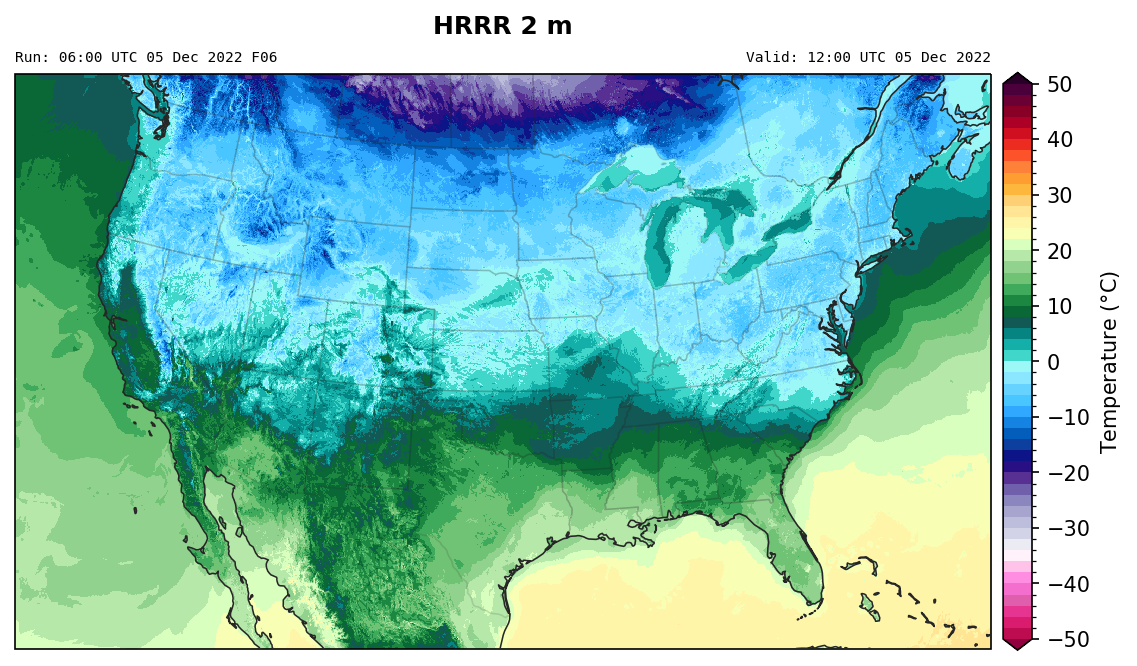

In [15]:
ds.herbie.plot()